# Grafo 
A diferencia de las visualizaciones geográficas en un "grafo" los puntos no tienen una posición en el espacio. Es decir, no tenemos ejes de coordenadas. Simplemente tendremos los puntos, y como se conectan entre ellos. La importante de visualizar grafos es poder analizar como se conectan los vértices para detectar patrones, puntos de fallo, comunidades o vértices más importantes o centrales.   
**Otros nombres**: Network, Red

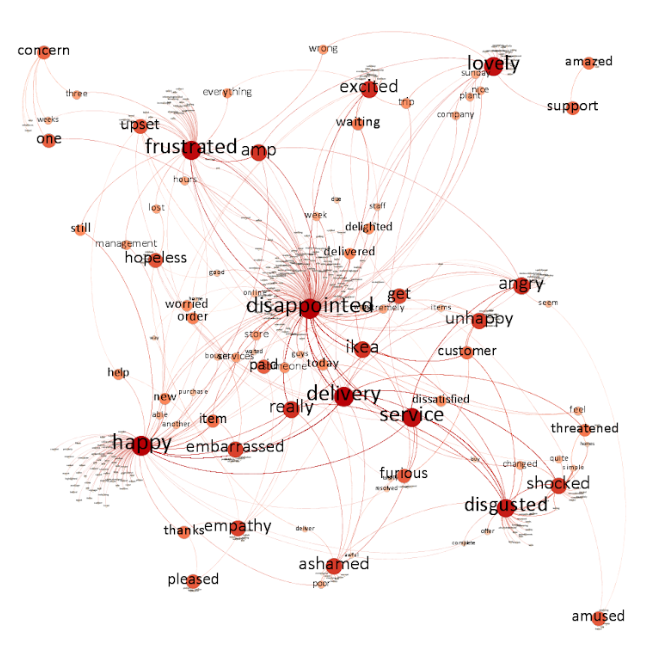


### Consejos
- Puedo codificar una variable numérica o categórica relacionada a los vértices de las siguientes maneras:
  - Cambiando el tamaño de los vertices para que dependa de una variable numérica
  - Cambiando el color de los vertices para que la intensidad refleje una variable numérica. O que la tonalidad dependa de una variable categórica
- Los grafos son una de las visualizaciones más difíciles de lograr ya que rápidamente se vuelven muy densas con una cantidad relativamente baja de puntos. Más aún si quiero mostrar las etiquetas en cada nodo.
- Para mitigar lo copado que puede llegar a verse un grafo, puedo utilizar las siguiente técnicas:
  - Jugar con la opacidad de los nodos y ejes es muy importante. Incluso puedo hacer que dependa de alguna variable numérica
  - Evitar mostrar todas las etiquetas de cada nodo
  - Filtrar los nodos y ejes por una **propiedad** del grafo. Por ejemplo: 
    - Filtrar solo los nodos que tengan mas de cierto grado.
    - Filtrar los nodos por una medida de centralidad mayor a cierto valor. 
    - Filtrar los ejes que tengan un peso mayor a cierto valor.
  - Intentar con los diferentes algoritmos de disposición de grafos (más información: http://yifanhu.net/PUB/ch16.pdf)
- Si los puntos existen bajo un contexto geográfico, preferiríamos graficar un Mapa de Conecciones o Flujo. Que es un grafo cuyos vertices poseen coordenadas y lo podemos dibujar sobre de un mapa. 

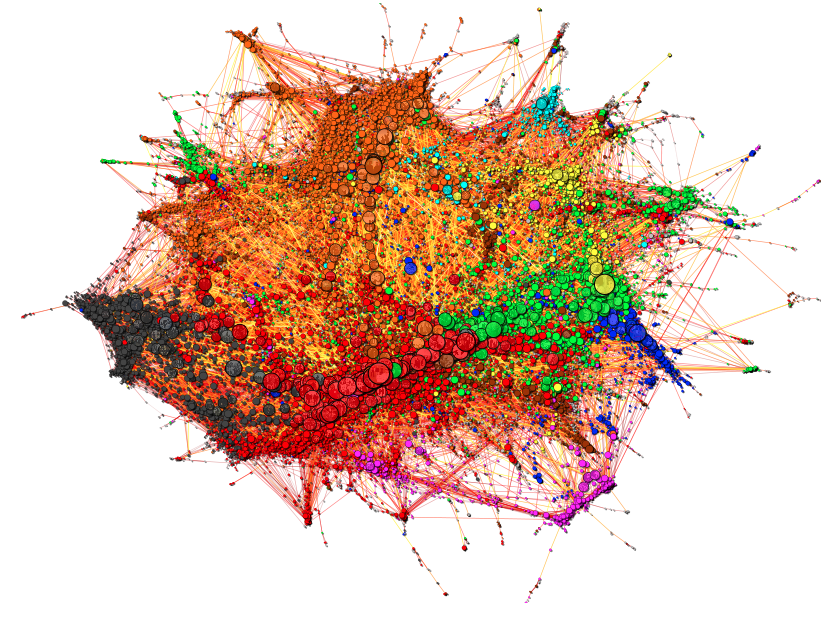


## En esta clase
### Datos
Grafo de interacciones en la red social Gab. **Nodos**: Usuarios de la red. **Ejes**: Si un usuario interactuó con otro. El peso de los ejes determina cuantas veces han interactuado los dos usuarios.
### Objetivos
1. Dibujar el grafo de interacciones

## Referencias
- https://datavizcatalogue.com/methods/network_diagram.html

In [8]:
%pip install networkx


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
# Leemos los datos con Pandas
nodos = pd.read_csv('../data/grafo_interaccion_2/nodes.csv')
nodos

id                  label  pagerank      community
0             Moonbasking            Moonbasking  0.595979    25769803776
1                 Hettman                Hettman  0.762746  1219770712064
2               essexgirl              essexgirl  0.595979    25769803776
3                  duanes                 duanes  0.639164   910533066752
4                 Georuff                Georuff  0.550180   781684047872
5              leadguitar             leadguitar  0.669611  1305670057984
6                 Hossfly                Hossfly  0.595979    25769803776
7                 GadflyM                GadflyM  0.706065   266287972352
8            TheDailyStir           TheDailyStir  0.550180   352187318273
9         DelilahMcIntosh        DelilahMcIntosh  0.669611  1305670057984
10               bbeeaann               bbeeaann  0.550180  1116691496960
11                   dmc2                   dmc2  0.669611  1305670057984
12         MadJewessWoman         MadJewessWoman  1.419184   936302870528
13             SoaringNow             SoaringNow  0.550180   352187318273
14              Mdonato48              Mdonato48  0.595979   369367187456
15       AnonymousFred514       AnonymousFred514  1.132265   936302870528
16                   KMFL                   KMFL  0.707500   936302870528
17               TStephen               TStephen  0.762746  1116691496960
18  UnrepentantDeplorable  UnrepentantDeplorable  0.943568   515396075520
19             PaesurBiey             PaesurBiey  1.147333   541165879296
20                 ChrisW                 ChrisW  0.550180   592705486848
21            Timisfamous            Timisfamous  1.322605  1262720385024
22       CrawfishFestival       CrawfishFestival  0.669611  1305670057984
23              MungoJack              MungoJack  0.595979    25769803776
24              OldeDutch              OldeDutch  0.770873   781684047872
25     Soft_Power_Thinker     Soft_Power_Thinker  1.142954   910533066752
26                    NHN                    NHN  1.352958   936302870528
27          Quartermaster          Quartermaster  0.550180   781684047872
28       brutuslaurentius       brutuslaurentius  0.550180   352187318273
29              MikeinDFW              MikeinDFW  0.639164   910533066752
30              Escoffier              Escoffier  1.132265   936302870528
31           BarryDagutis           BarryDagutis  0.595979    25769803776
32       DeplorableSpirit       DeplorableSpirit  1.223986  1262720385024
33               HickTick               HickTick  0.706065   266287972352
34             JustVoteNo             JustVoteNo  0.550180   352187318273
35              Cocoabear              Cocoabear  0.550180   352187318273
36          GuardAmerican          GuardAmerican  1.132265   936302870528
37           LIttle_Buddy           LIttle_Buddy  0.595979    25769803776
38          wirelessguru1          wirelessguru1  8.913115  1116691496961
39          ROCKintheUSSA          ROCKintheUSSA  0.762746  1116691496960
40             Joe-Miller             Joe-Miller  1.828515  1142461300736
41             CajunTexan             CajunTexan  0.550180   352187318273
42        RealTrumpTweets        RealTrumpTweets  3.869552  1194000908288
43       DeplorableSurfer       DeplorableSurfer  0.762746  1219770712064
44                EEJinLV                EEJinLV  0.639164   910533066752
45           WaitWatchSee           WaitWatchSee  1.322605  1262720385024
46             angusyoung             angusyoung  0.595979    25769803776
47                Larry63                Larry63  1.147333  1305670057984
48            Primate_Doc            Primate_Doc  0.707500   936302870528
49              Sheepster              Sheepster  0.639164   910533066752
50              free2bvee              free2bvee  0.669611  1305670057984
51              HiramHawk              HiramHawk  0.595979    25769803776
52             jimbostj15             jimbostj15  0.550180   352187318273

In [27]:
ejes = pd.read_csv('../data/grafo_interaccion_2/edges.csv')
ejes

src               dst  weight
0        Moonbasking         HiramHawk       1
1   brutuslaurentius   RealTrumpTweets       1
2       WaitWatchSee         OldeDutch       1
3       WaitWatchSee  DeplorableSpirit       1
4         PaesurBiey   DelilahMcIntosh       1
..               ...               ...     ...
59  DeplorableSurfer           Hettman       1
60      TheDailyStir   RealTrumpTweets       1
61          bbeeaann    MadJewessWoman       1
62       Moonbasking           Hossfly       1
63        jimbostj15   RealTrumpTweets       1

[64 rows x 3 columns]

In [28]:
G = nx.from_pandas_edgelist(
    ejes,
    source='src',
    target='dst',
    edge_attr='weight'
)
G

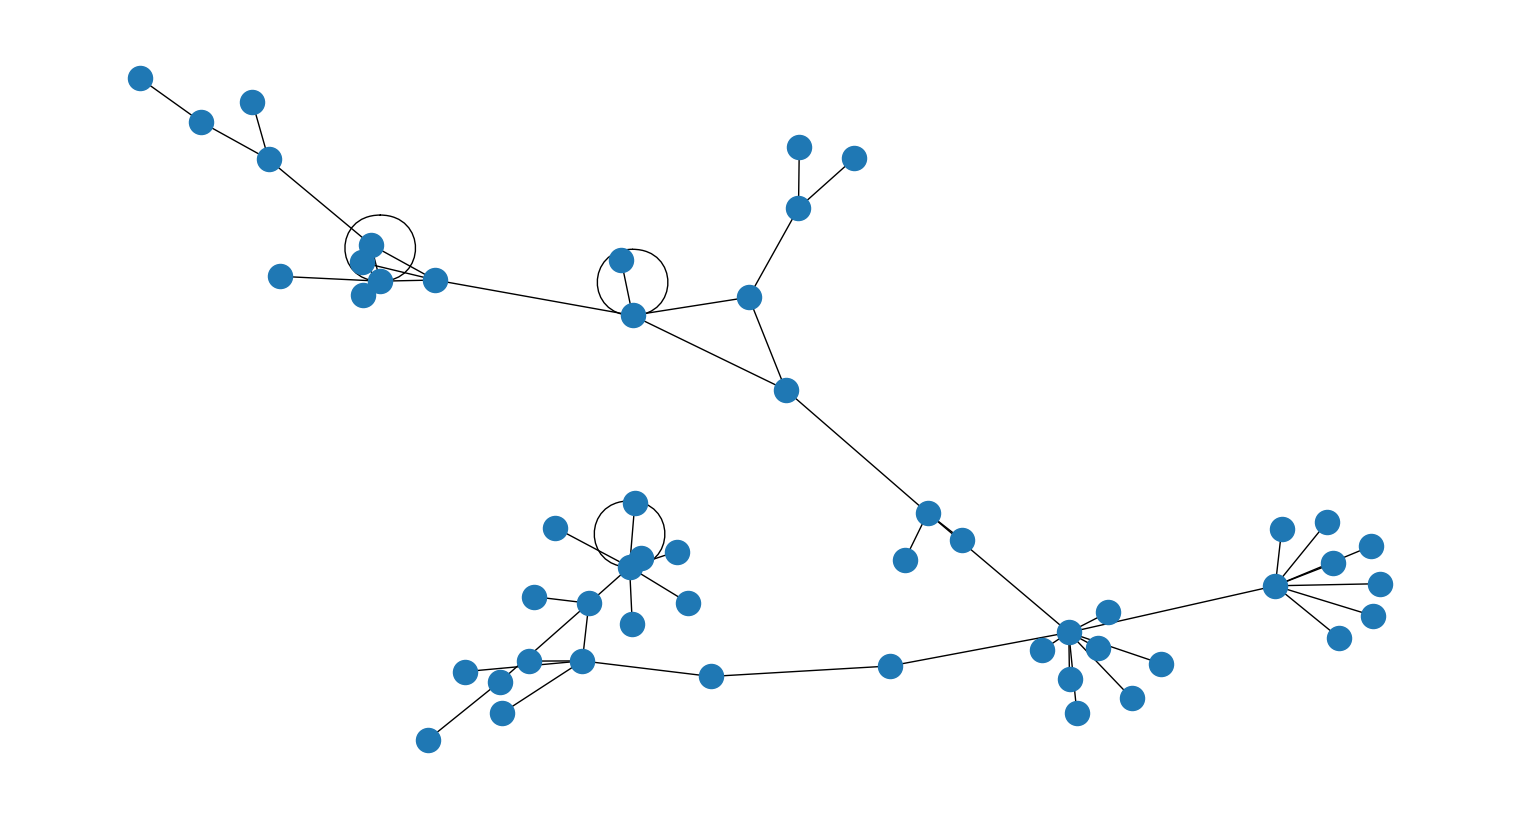

In [39]:
# Graficos con Network X
# https://networkx.org/documentation/stable/reference/drawing.html
plt.rcParams["figure.figsize"] = (15, 8)
nx.draw(G)

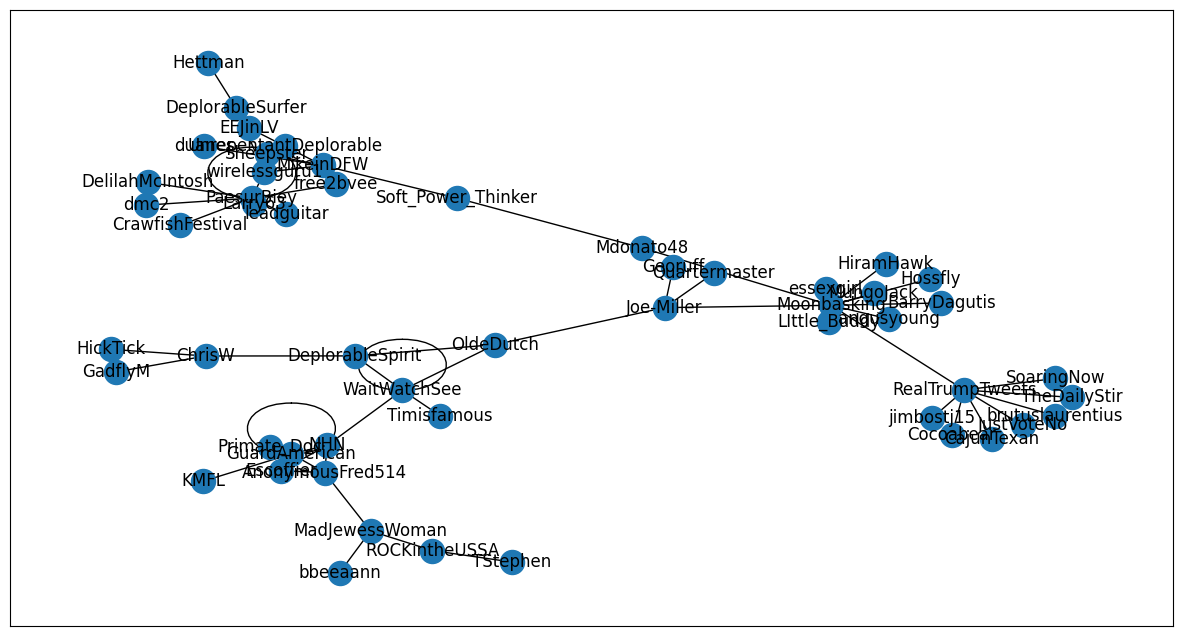

In [42]:
nx.draw_networkx(G)

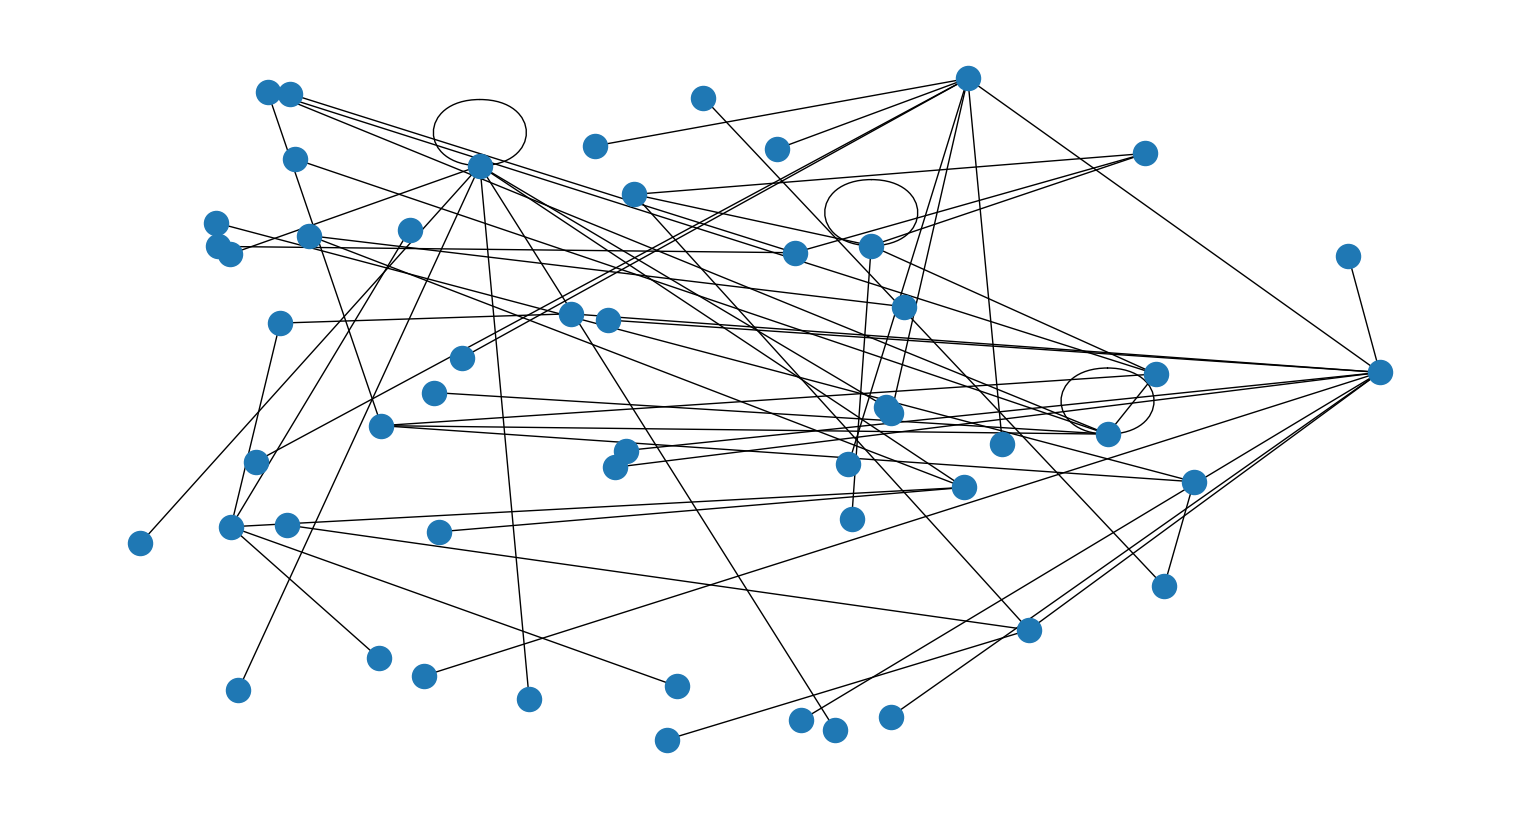

In [44]:
nx.draw_random(G)

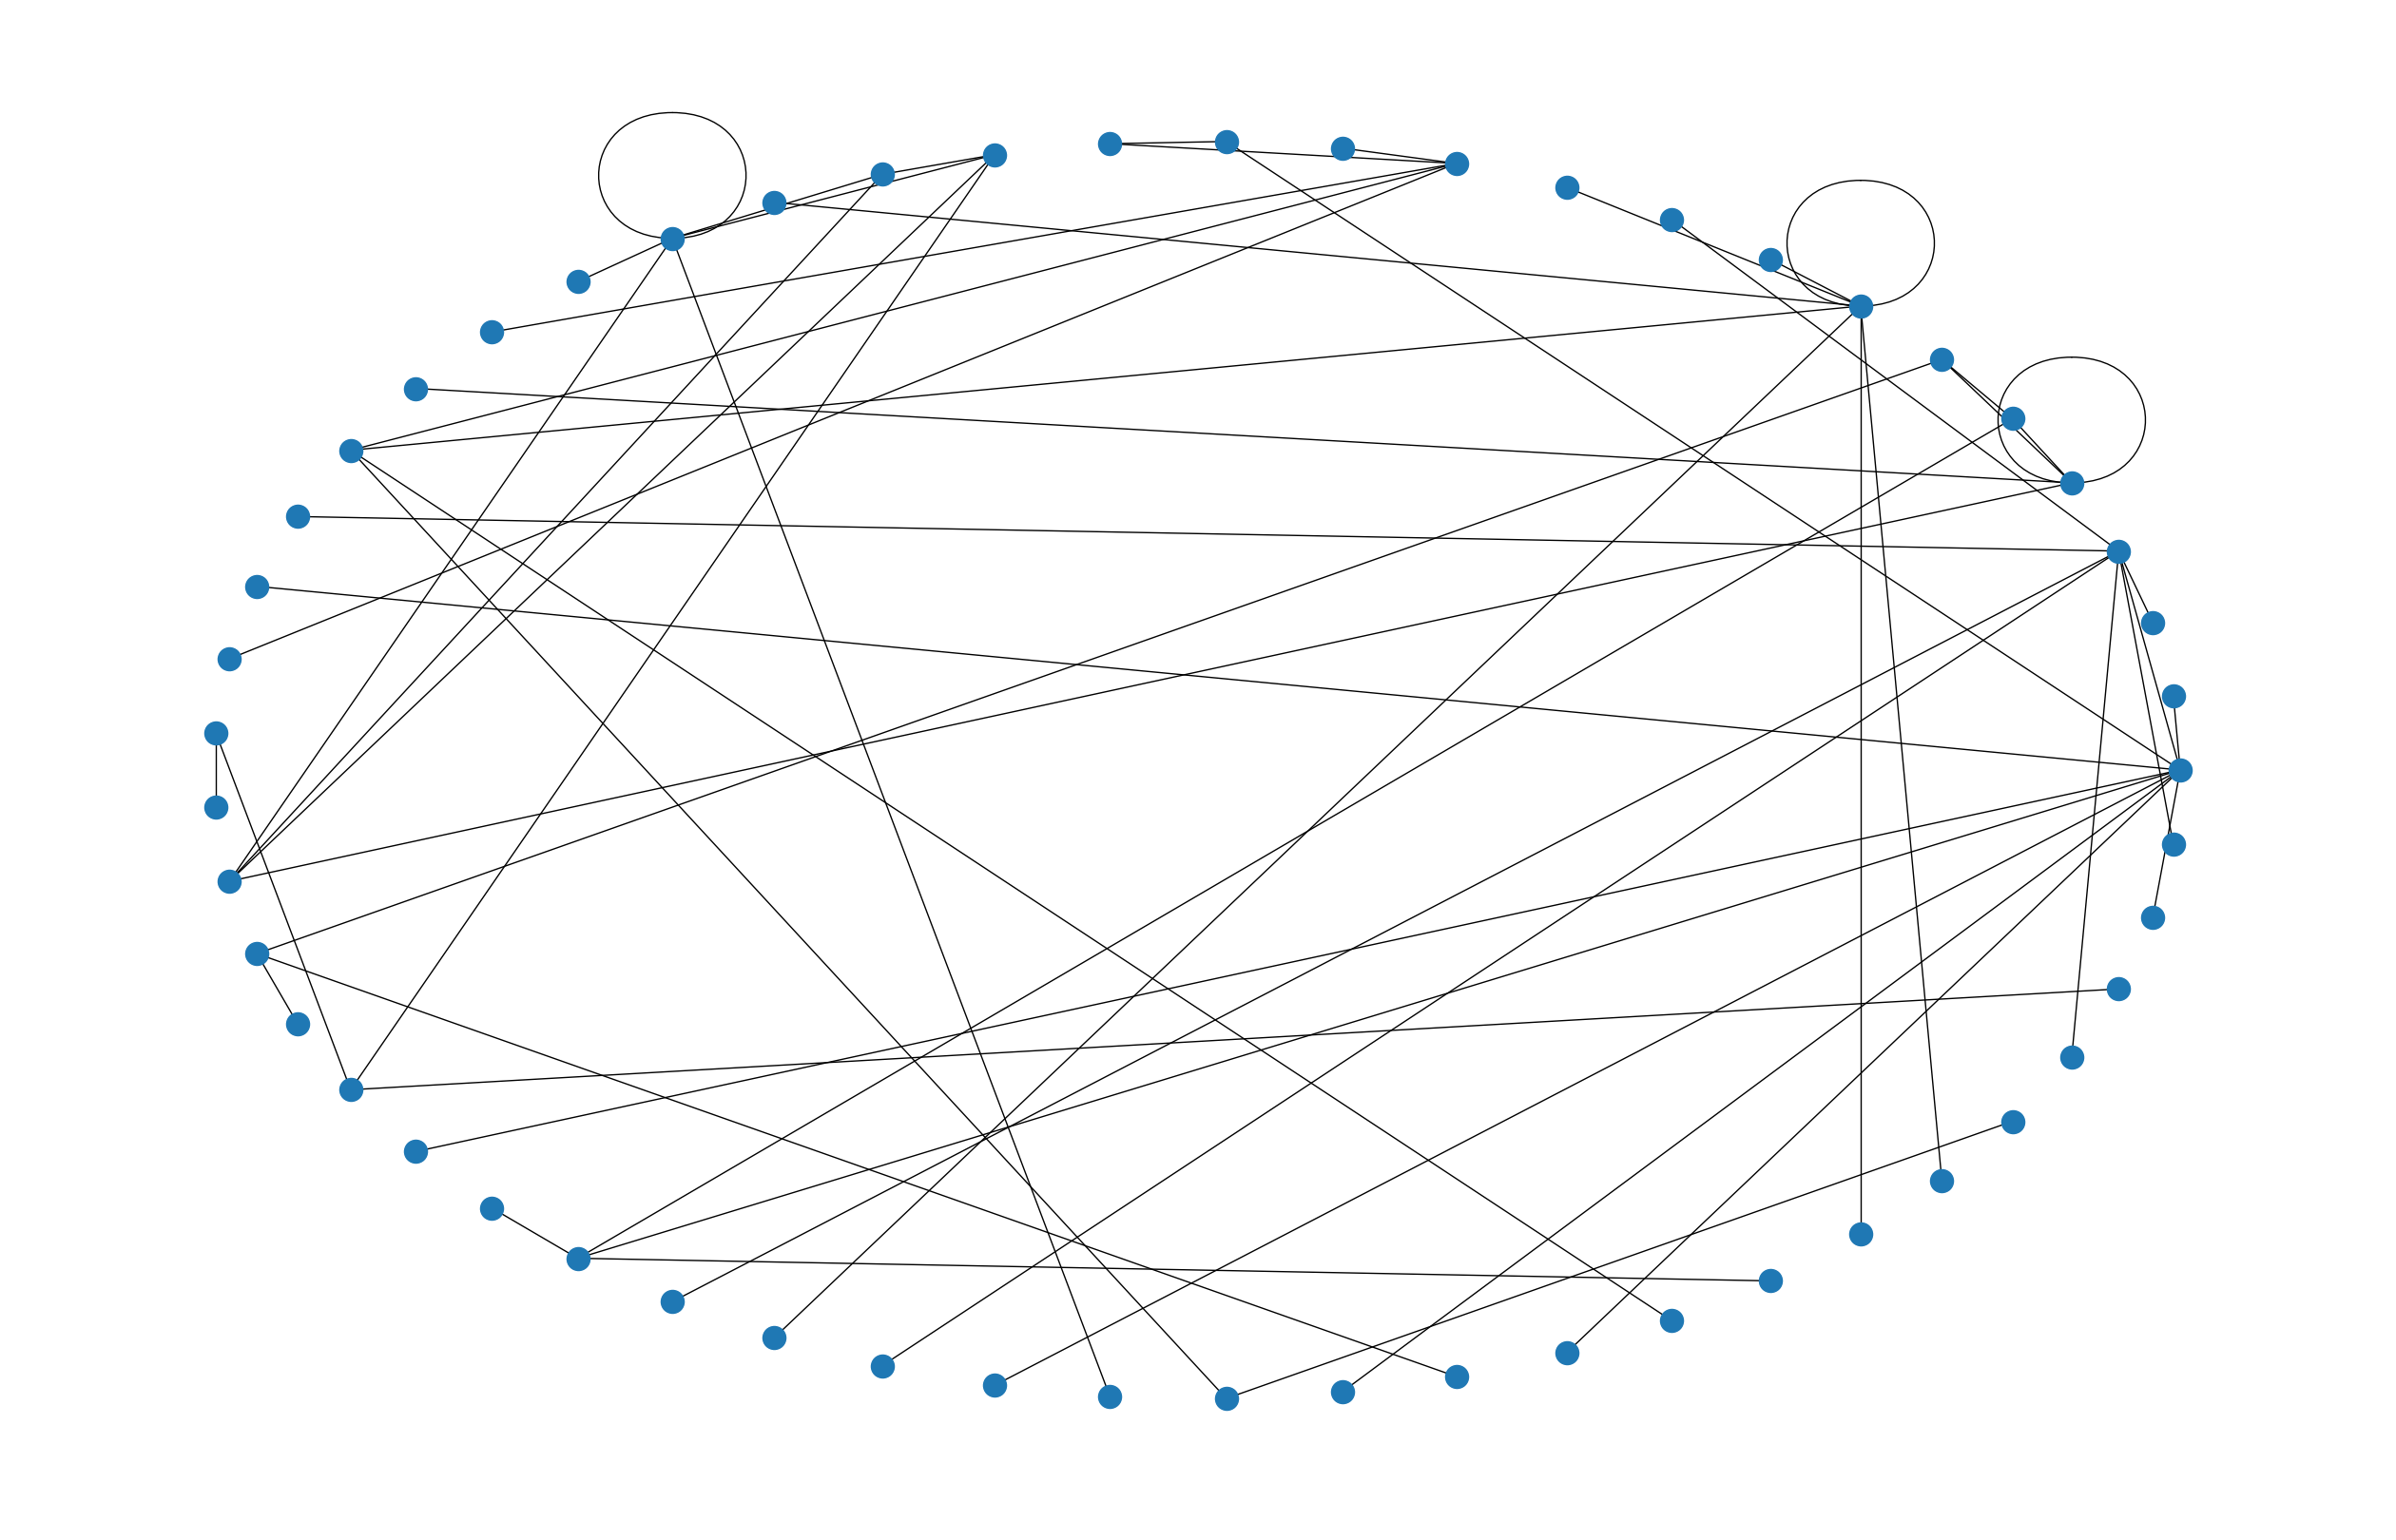

In [92]:
# Tambien se le denomina "Diagrama de Cuerdas sin Lazos"
nx.draw_circular(G)

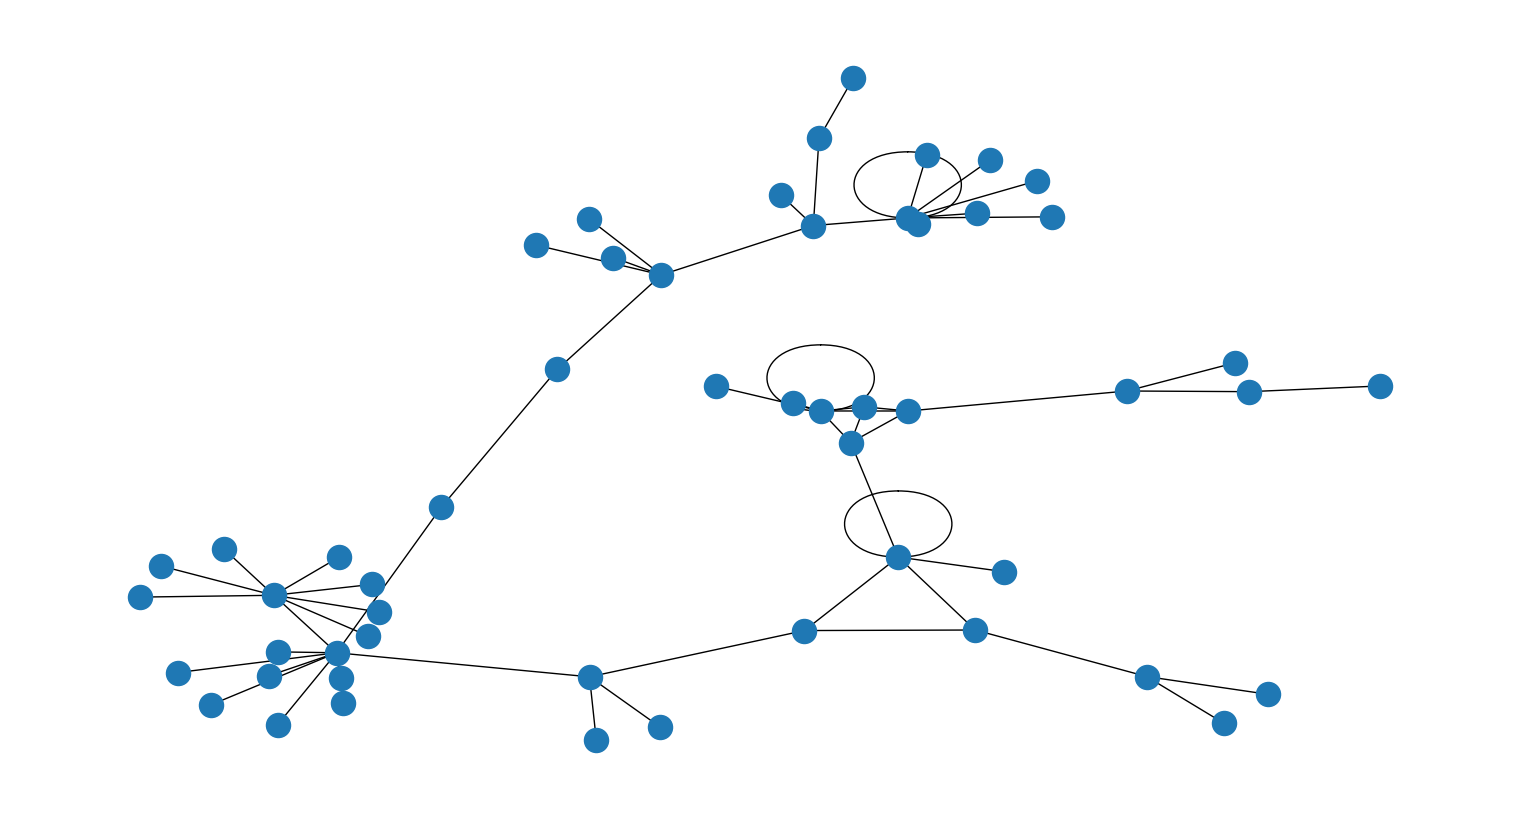

In [45]:
nx.draw_spring(G)

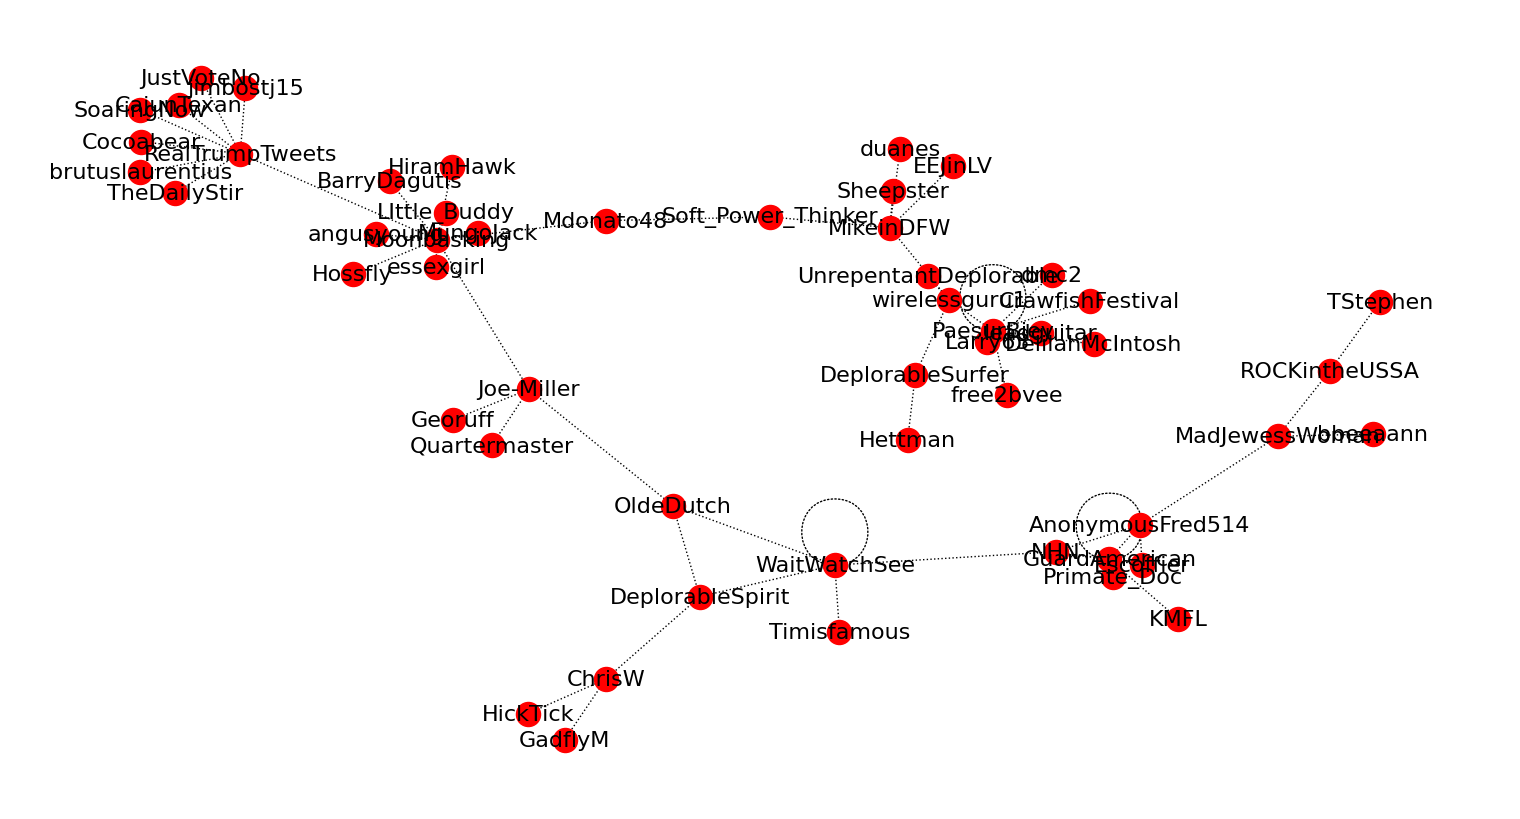

In [64]:
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
nx.draw_spring(
    G,
    with_labels=True,
    node_size=300,
    node_color='red',
    #alpha=0.5,
    width=1,
    style=':',
    font_size=16,
)

## Algoritmos de Posicionamiento de NetworkX

- Circular: Posiciona los nodos en un circulo `circular_layout(G)`
- Random: Posiciona los nodos de forma aleatoria `random_layout(G)`
- Shell: Posiciona los nodos en circulos concentricos `shell_layout(G)`
- Spring: Posiciona los nodos utilizando el algoritmo Fruchterman-Reingold `spring_layout(G)`
- Spectral: Posiciona los nodos utilizando una medida de importancia de los nodos (eigen vector) `spectral_layout(G)`

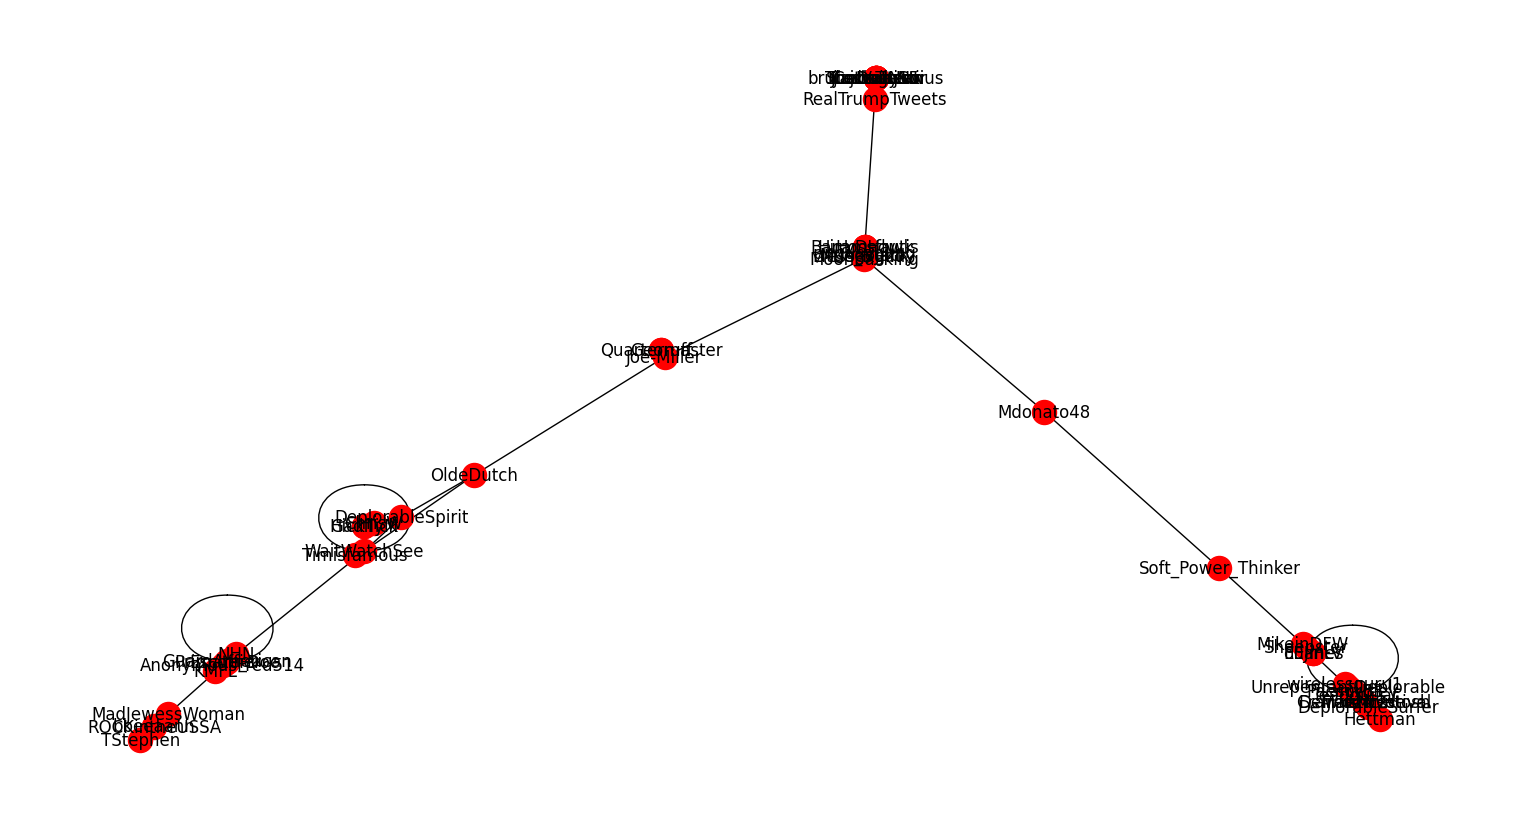

In [67]:
# Los nodos mas importantes estaran arriba, los nodos menos importantes abajo
nx.draw_spectral(
    G,
    with_labels=True,
    node_size=300,
    node_color='red',
    #alpha=0.5,
    width=1
)

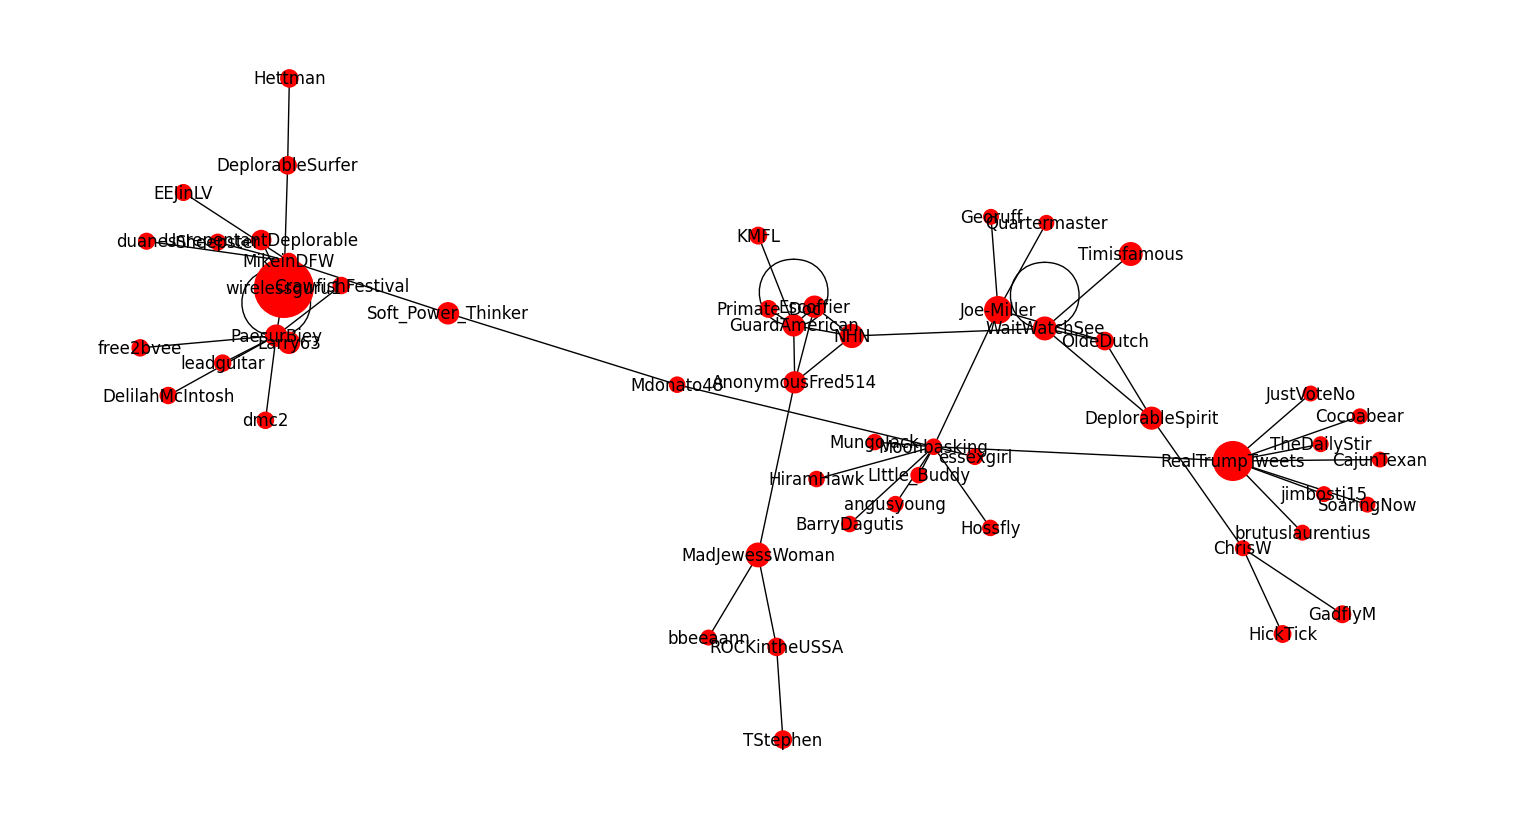

In [75]:
# Con tamaño variable dependiendo de atributo numérico de los nodos
nx.draw_spring(
    G,
    with_labels=True,
    nodelist=list(nodos['id']),
    node_size=list(nodos['pagerank'] * 200),
    node_color='red'
)

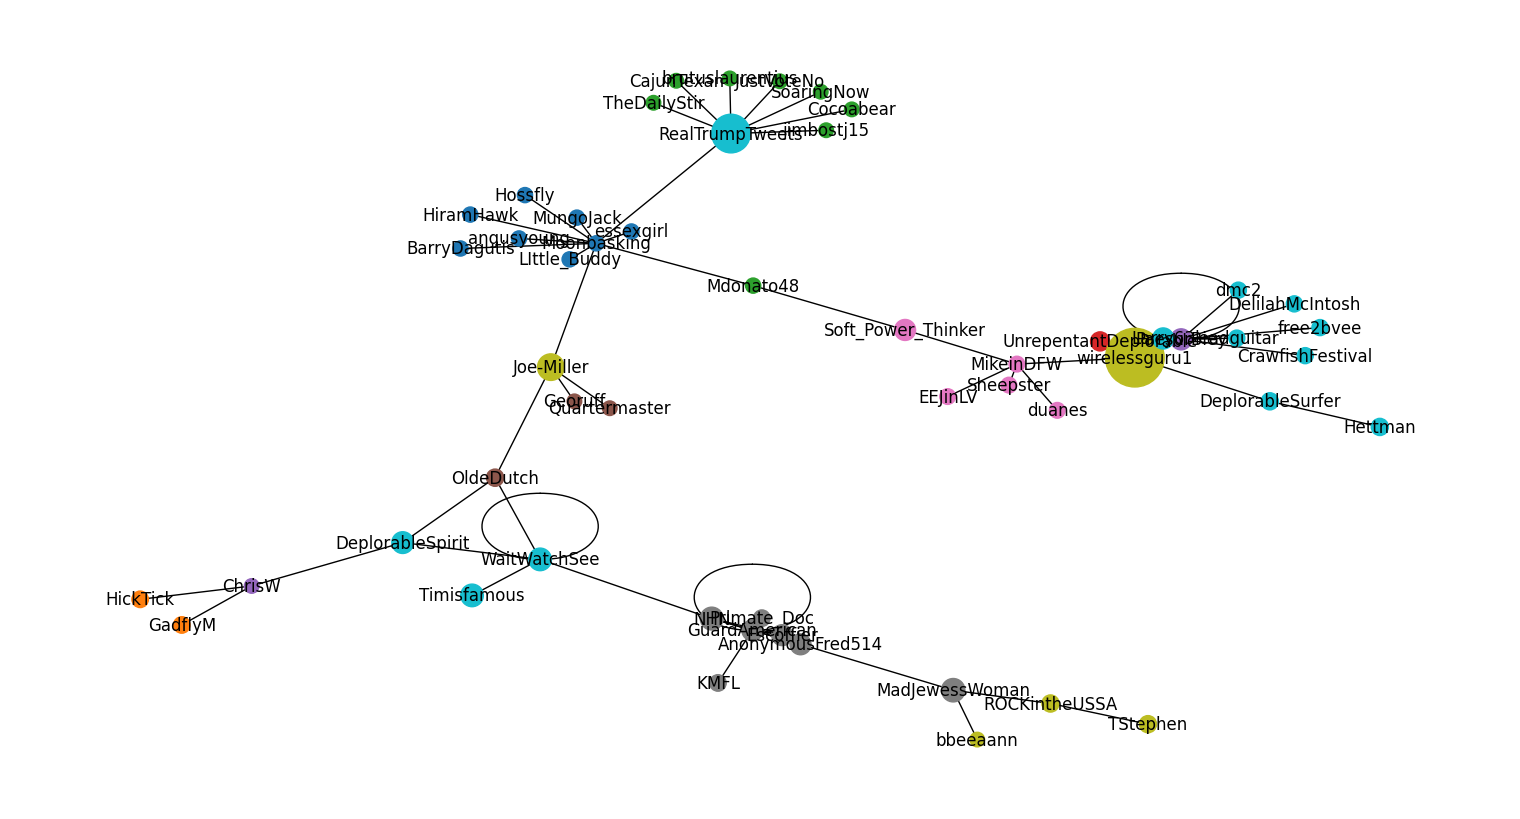

In [87]:
# Con tamaño y color variable dependiendo de atributo numérico de los nodos
nx.draw_spring(
    G,
    with_labels=True,
    nodelist=list(nodos['id']),
    node_size=list(nodos['pagerank'] * 200),
    node_color=list(nodos['community']),
    cmap='tab10'
)

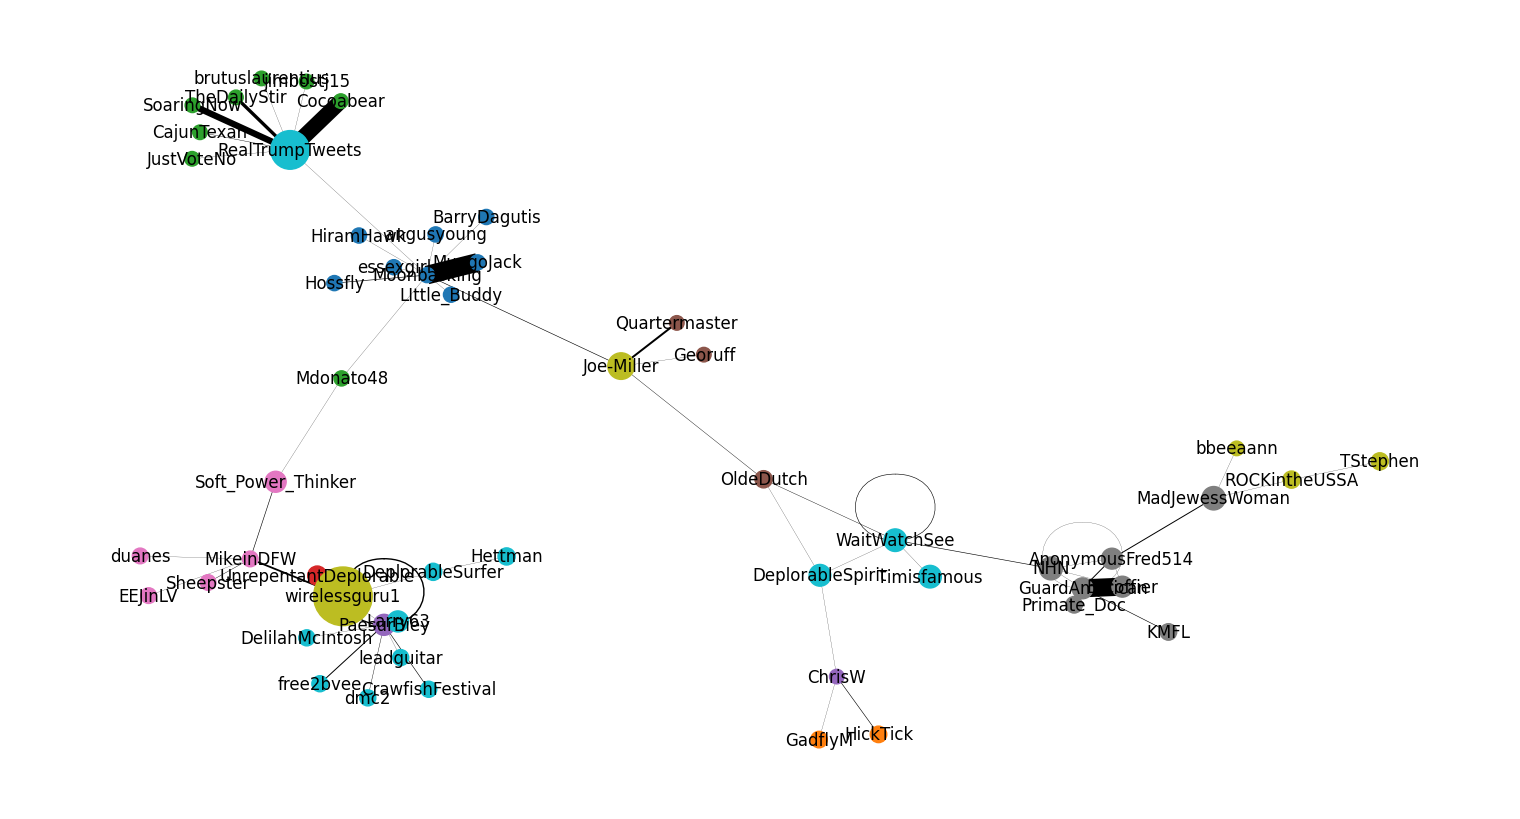

In [88]:
# Con tamaño ancho de ejes variables dependiendo del peso de la conección
nx.draw_spring(
    G,
    with_labels=True,
    nodelist=list(nodos['id']),
    node_size=list(nodos['pagerank'] * 200),
    node_color=list(nodos['community']),
    cmap='tab10',
    width=list(ejes['weight'] / 7)
)

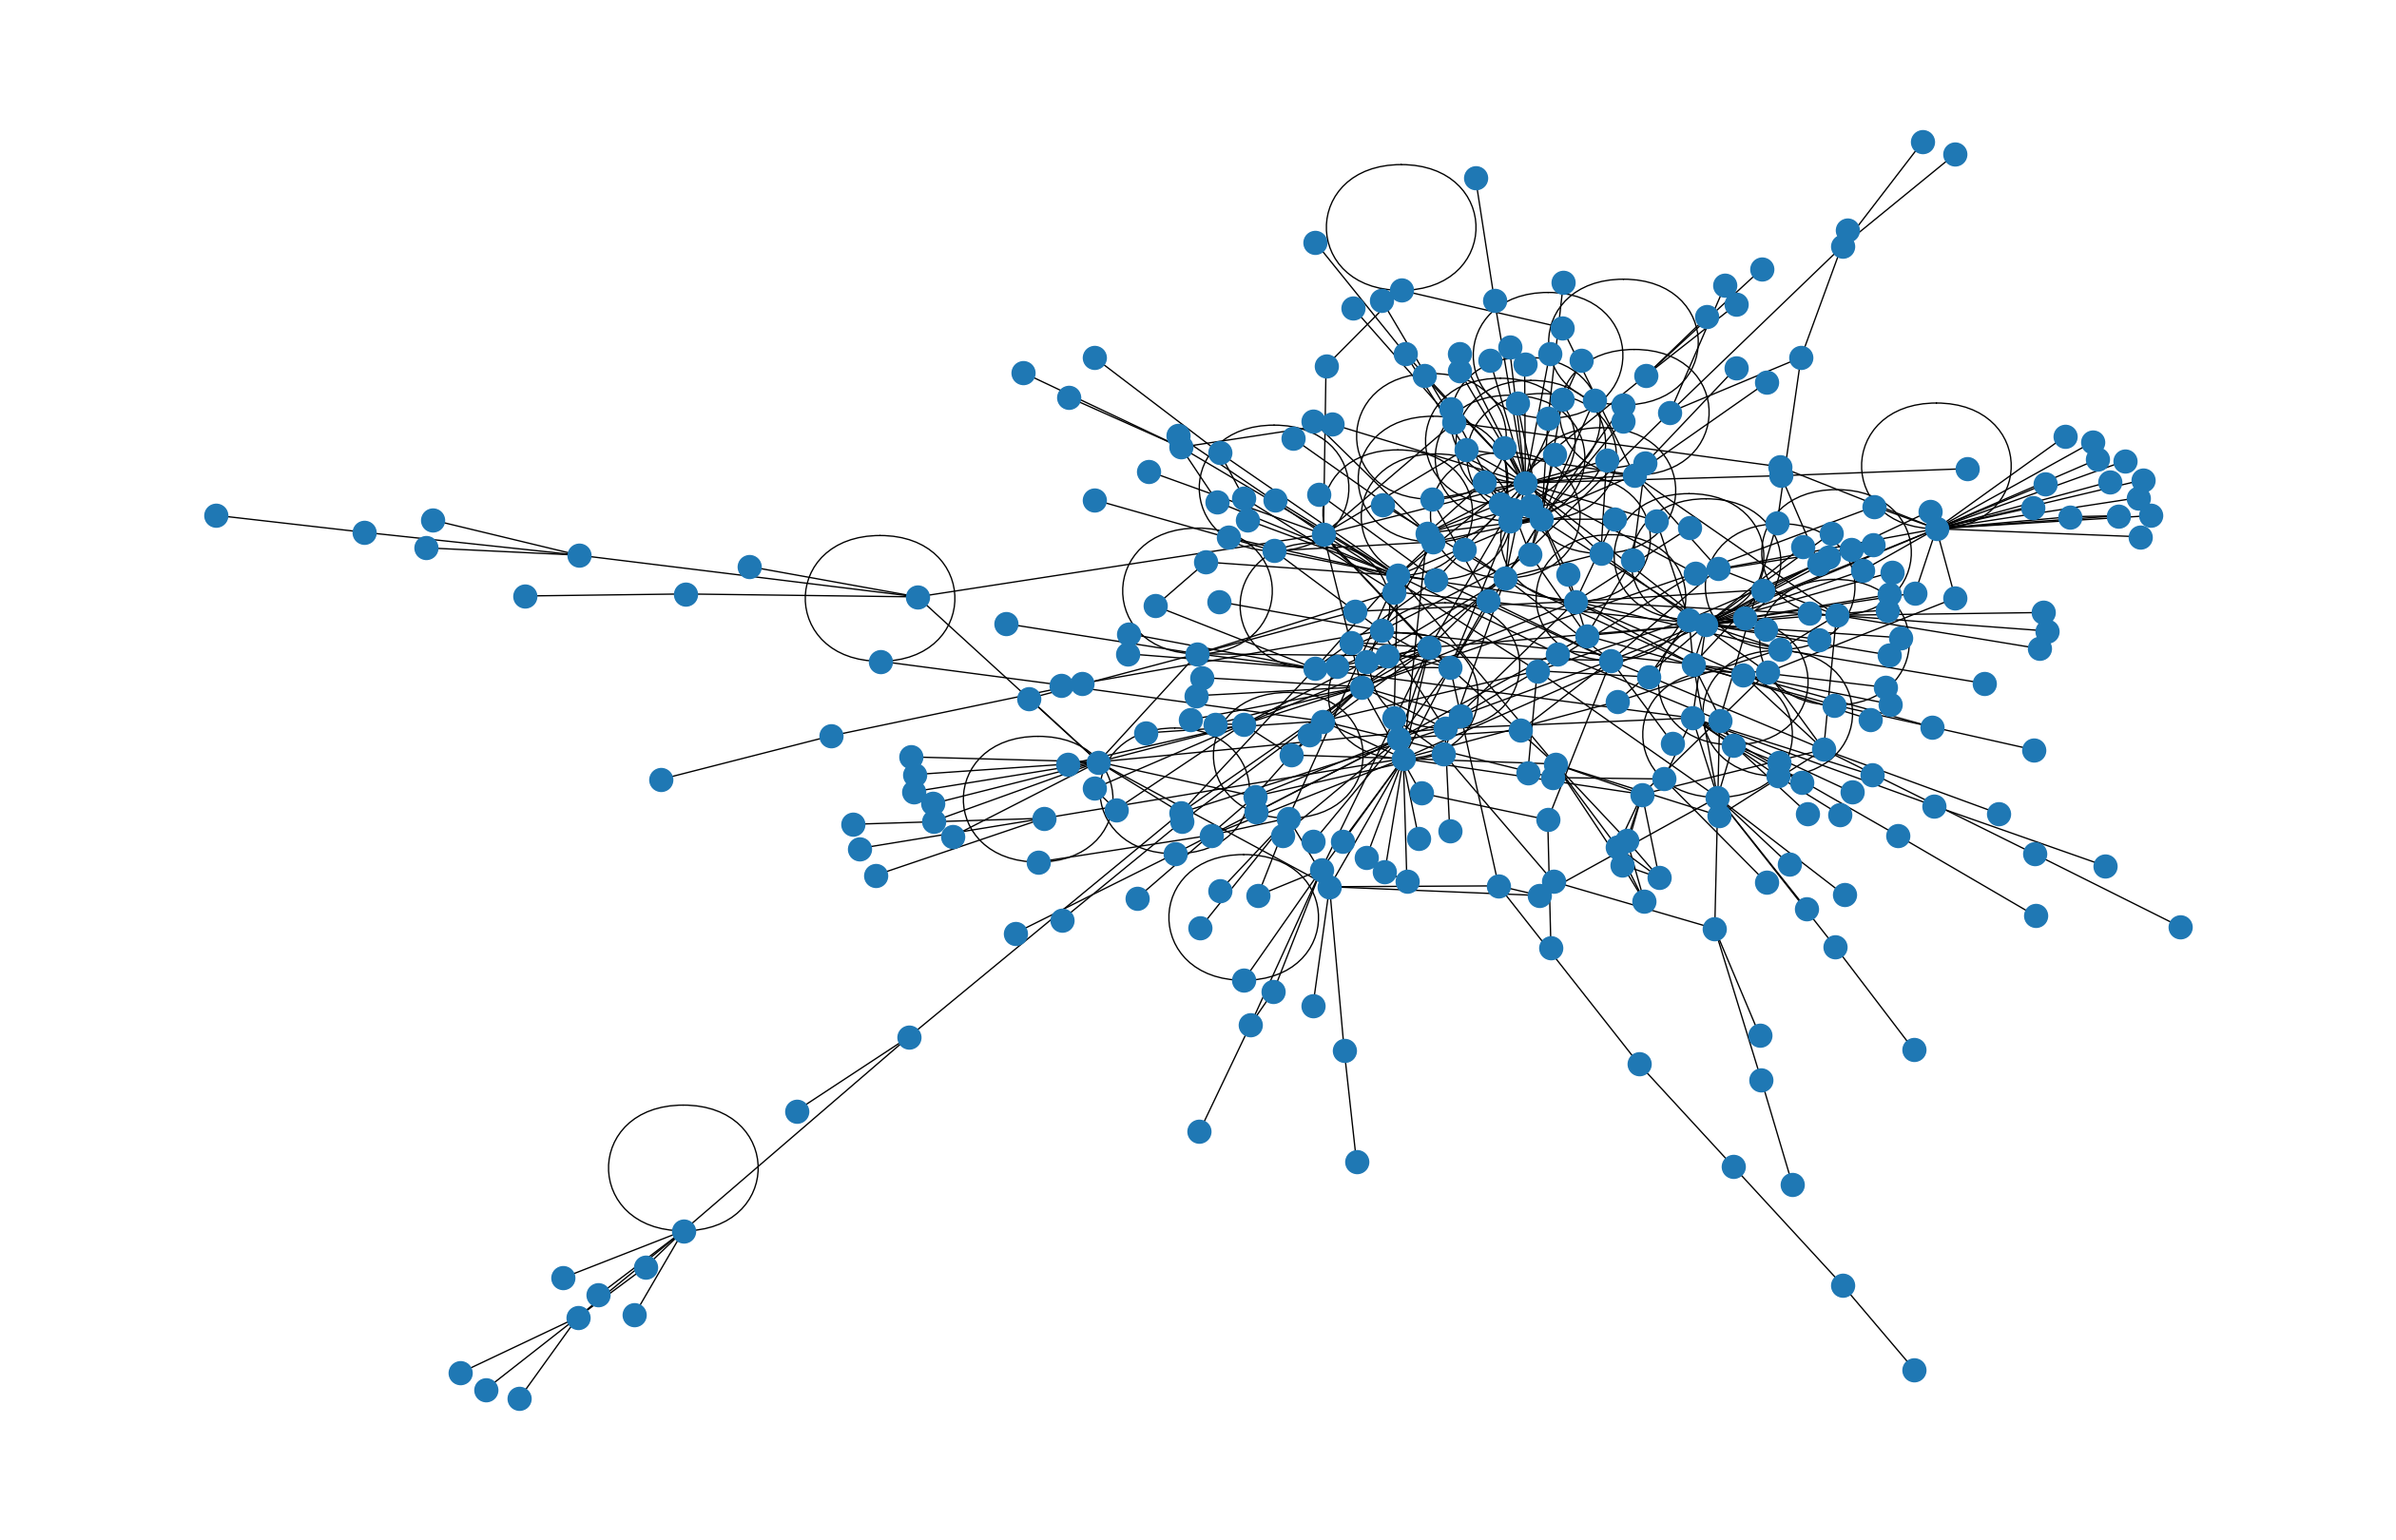

In [91]:
# Rapidamente se pueden volver ilegibles si tenemos muchos nodos o ejes...
nodos2 = pd.read_csv('../data/grafo_interaccion/nodes.csv')
ejes2 = pd.read_csv('../data/grafo_interaccion/edges.csv')
G2 = nx.from_pandas_edgelist(
    ejes2,
    source='src',
    target='dst',
    edge_attr='weight'
)
plt.rcParams["figure.figsize"] = (25, 16)
nx.draw(G2)

### Grafos en Plotly
Plotly no es una librería especializada en grafos por lo que su implementación es complicada. Les dejo una guía:
https://plotly.com/python/network-graphs/